In [38]:
import os, json
import pandas as pd

path_to_json = '/Users/theo/Downloads/export-20230813-000/Sport-sessions/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

df = pd.DataFrame(columns=['duration', 'calories', 'conditions', 'temperature', 'distance', 'average_pace'])

for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        if json_text['sport_type_id'] == '1':
            duration = json_text['duration']
            calories = json_text['calories']
            conditions = json_text['features'][0]['attributes']['conditions']
            temperature = json_text['features'][0]['attributes']['temperature']
            distance = json_text['features'][2]['attributes']['distance']
            average_speed = json_text['features'][2]['attributes']['average_speed']
            average_pace =  (json_text['duration'] / 60) / (json_text['features'][2]['attributes']['distance'])

            df.loc[index] = [duration, calories, conditions, temperature, distance, average_pace]

In [39]:
df

,duration,calories,conditions,temperature,distance,average_pace
0,3467829,710,cloudy,5.0,10558,5.474252
1,6739000,1509,cloudy,16.0,20523,5.472722
3,3551267,763,rainy,4.0,10535,5.618204
4,7129065,1608,cloudy,7.0,23203,5.120793
5,2868428,637,cloudy,17.0,9130,5.236269
...,...,...,...,...,...,...
567,3480000,808,cloudy,21.0,11532,5.029483
569,4048422,860,night,1.0,12587,5.360586
570,2439000,556,rainy,22.0,7795,5.214881
571,3419252,757,night,7.0,11198,5.089081


In [40]:
print(df['distance'].corr(df['average_pace']))
print(df['temperature'].corr(df['average_pace']))

0.08356062005366006
-0.21915647454874532


In [50]:
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

plt.close("all")

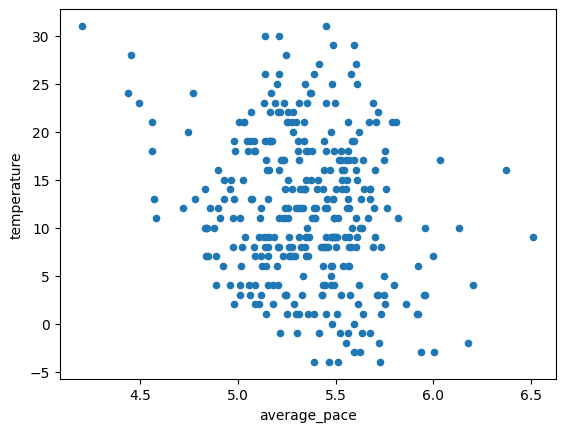

In [46]:
df.plot.scatter(x="average_pace", y="temperature");

<Axes: title={'center': 'average_pace'}, xlabel='[conditions]'>

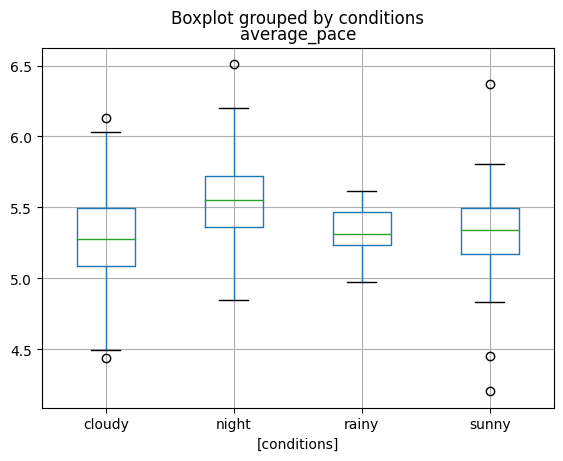

In [48]:
df.boxplot(column=["average_pace"], by=["conditions"])

<Axes: title={'center': 'average_pace'}, xlabel='[conditions]'>

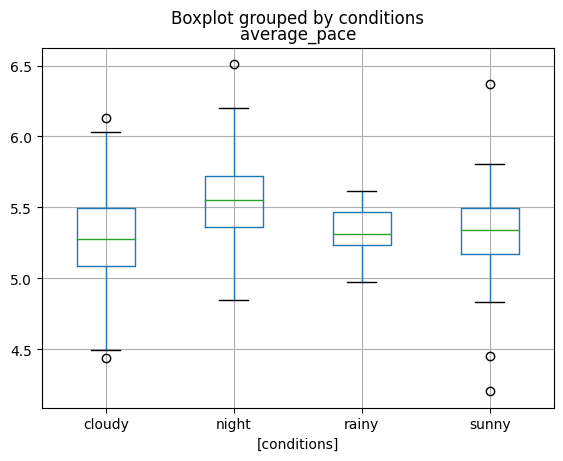

In [48]:
df.boxplot(column=["average_pace"], by=["conditions"])

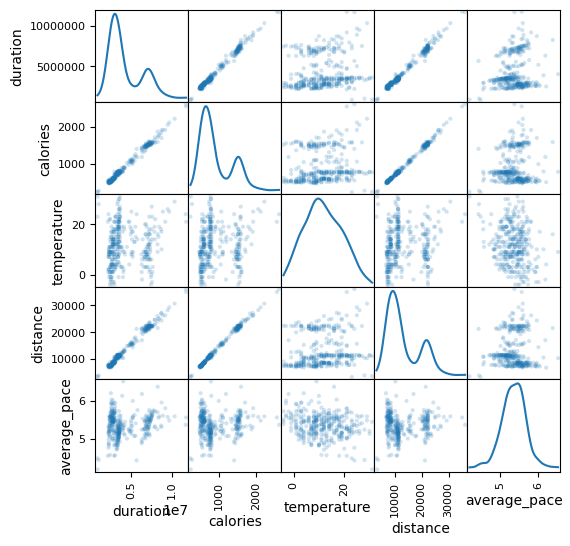

In [53]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");

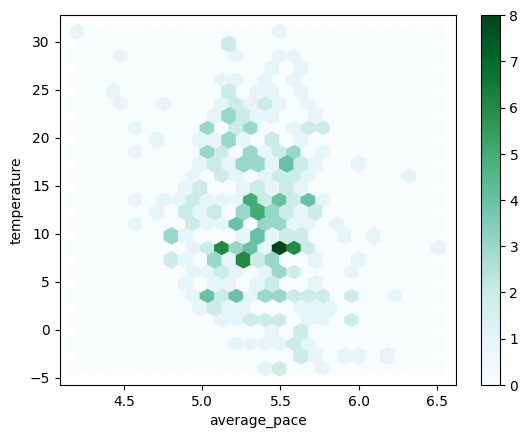

In [56]:
df.plot.hexbin(x="average_pace", y="temperature", gridsize=25);


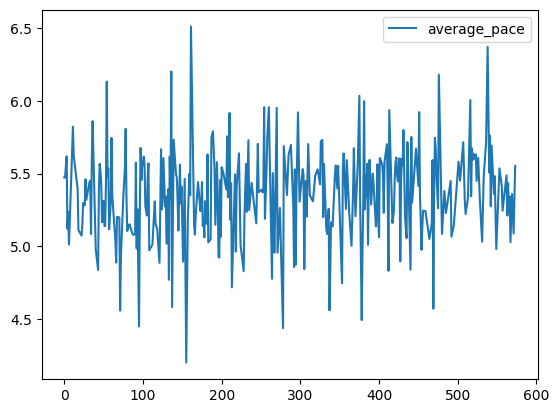

In [59]:
df.plot(y="average_pace");